In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, GRU
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping
import datetime

In [29]:
data = pd.read_csv('data.csv', index_col=0)

In [30]:
data.head()

,open,high,low,close,volume
20190826,43050,43800,42950,43600,7954949
20190823,43800,44200,43650,43950,5017381
20190822,44500,44700,43850,44050,8061177
20190821,44350,44800,44150,44500,6571717
20190820,43950,44600,43550,44450,8434205


In [31]:
high_prices = data['high'].values
low_prices = data['low'].values
mid_prices = (high_prices + low_prices) / 2

In [32]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [36]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((494, 50, 1), (55, 50, 1))

In [43]:
model = Sequential()

model.add(GRU(50, return_sequences=True, input_shape=(50, 1)))

model.add(GRU(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 50, 50)            7800      
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                22080     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 29,945
Trainable params: 29,945
Non-trainable params: 0
_________________________________________________________________


In [52]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [45]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=20,
          call_backs=[early_stop]
         )

Train on 494 samples, validate on 55 samples
Epoch 1/20
494/494 [==============================] - 12s 25ms/step - loss: 196.2867 - val_loss: 0.0524
Epoch 2/20
494/494 [==============================] - 6s 13ms/step - loss: 147.3582 - val_loss: 0.1005
Epoch 3/20
494/494 [==============================] - 6s 13ms/step - loss: 128.0391 - val_loss: 0.1696
Epoch 4/20
494/494 [==============================] - 7s 13ms/step - loss: 111.0199 - val_loss: 0.0829
Epoch 5/20
494/494 [==============================] - 6s 13ms/step - loss: 96.4701 - val_loss: 0.2475
Epoch 6/20
494/494 [==============================] - 7s 13ms/step - loss: 83.5277 - val_loss: 0.0395
Epoch 7/20
494/494 [==============================] - 7s 14ms/step - loss: 72.2532 - val_loss: 0.1040
Epoch 8/20
494/494 [==============================] - 6s 12ms/step - loss: 62.3561 - val_loss: 0.0694
Epoch 9/20
494/494 [==============================] - 6s 12ms/step - loss: 54.2595 - val_loss: 0.0832
Epoch 10/20
494/494 [===========

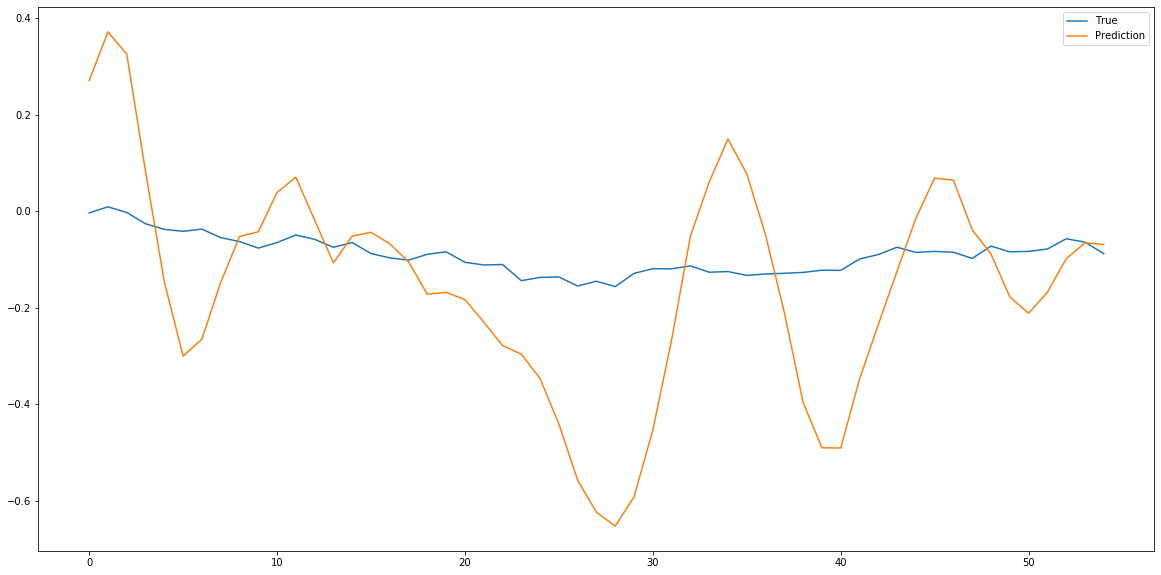

In [46]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()